In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore") # For those annoying runtime warnings
import cartopy.feature as cfeature
import numpy as np
import os
%matplotlib widget

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import os

def plot_general_bathymetry(topo_file=os.path.expanduser('~/Desktop/british_columbia_3_msl_2013.nc'),
                             lon_bounds=(-129.2, -127.75), lat_bounds=(51.2, 52.0), title='Bathymetry Map', deepest = 1500):
    """
    Plot general bathymetry using your new dataset with lat/lon ticks and optional 0m contour.
    
    Parameters:
    - topo_file: str, path to your NetCDF file with 'Band1' elevation
    - lon_bounds: tuple, longitude limits
    - lat_bounds: tuple, latitude limits
    - add_contour_0m: bool, whether to overlay a black contour at 0 m elevation
    - title: str, plot title
    """

    # Load and subset bathymetry
    topo = xr.open_dataset(topo_file)
    topo = topo.sel(
        lon=slice(lon_bounds[0], lon_bounds[1]),
        lat=slice(lat_bounds[0], lat_bounds[1])
    )
    depth = -topo['Band1']

    # Set up figure
    fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([*lon_bounds, *lat_bounds], crs=ccrs.PlateCarree())

    # Coastlines and ticks
    # ax.coastlines(resolution='10m')
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0)
    gl.top_labels = False
    gl.right_labels = False
    
    # Bathymetry shading
    levels = np.linspace(0, deepest, 21)
    contourf = ax.contourf(topo['lon'], topo['lat'], depth,
                           levels=levels, cmap=cmocean.cm.deep, extend='both')
    ax.contour(topo['lon'], topo['lat'], depth, levels=[0.5], colors='black', linewidths=1)
    cbar = plt.colorbar(contourf, ax=ax, label='Depth (m)')
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))

    # Labels and title
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

def plot_general_bathymetry(topo_file=os.path.expanduser('~/Desktop/british_columbia_3_msl_2013.nc'),
                             lon_bounds=(-129.2, -127.75), lat_bounds=(51.2, 52.0),
                             title='Bathymetry Map', deepest=1500):

    # Load and subset bathymetry
    topo = xr.open_dataset(topo_file)
    topo = topo.sel(
        lon=slice(lon_bounds[0], lon_bounds[1]),
        lat=slice(lat_bounds[0], lat_bounds[1])
    )
    depth = -topo['Band1']

    # Set up figure
    fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([*lon_bounds, *lat_bounds], crs=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0)
    gl.top_labels = False
    gl.right_labels = False

    # Bathymetry shading
    spacing = 22
    levels = np.linspace(0, deepest, spacing)
    contourf = ax.contourf(topo['lon'], topo['lat'], depth,
                           levels=levels, cmap=cmocean.cm.deep, extend='both')

    # Add labeled contour lines at finer resolution
    fine_levels = np.linspace(0, deepest, 22)  
    contours = ax.contour(topo['lon'], topo['lat'], depth,
                          levels=fine_levels, colors='k', linewidths=0.3)
    ax.clabel(contours, fmt='%d', fontsize=3)

    # Optional 0.5 m contour
    # ax.contour(topo['lon'], topo['lat'], depth, levels=[0.5], colors='black', linewidths=1)

    # Colorbar
    cbar = plt.colorbar(contourf, ax=ax, label='Depth (m)')
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))

    # Labels and title
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

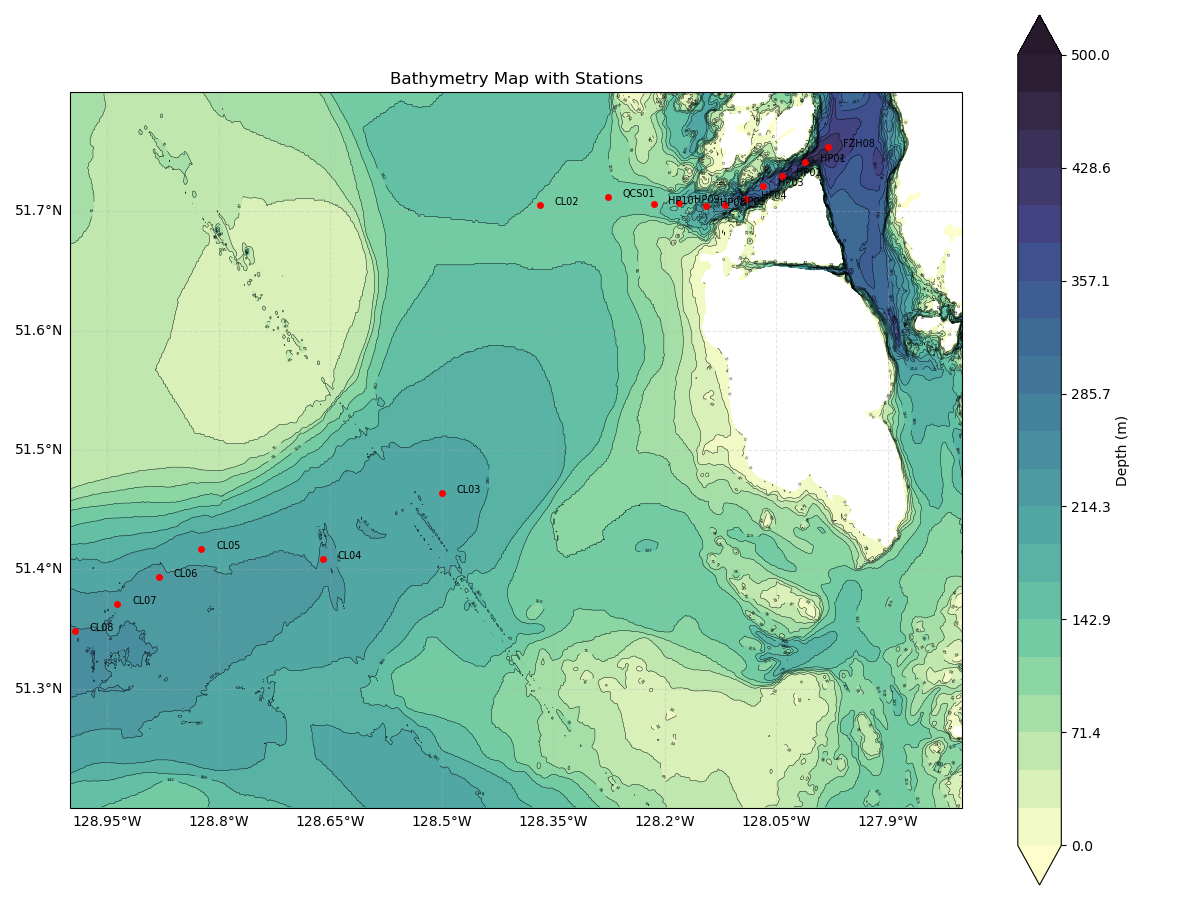

In [4]:
def plot_general_bathymetry_with_stations(
        topo_file=os.path.expanduser('~/Desktop/british_columbia_3_msl_2013.nc'),
        lon_bounds=(-134.8, -127.7), lat_bounds=(49.2, 52.0),
        title='Bathymetry Map with Stations', deepest=1500):
    
    # Station names and coordinates
    stations = {
        'FZH08': (51.7537, -127.9805),
        'HP01': (51.7413, -128.011),
        'HP02': (51.7295, -128.0428),
        'HP03': (51.721,  -128.068),
        'HP04': (51.7102, -128.0905),
        'HP05': (51.7053, -128.1192),
        'HP08': (51.7045, -128.1452),
        'HP09': (51.7067, -128.181),
        'HP10': (51.7062, -128.2152),
        'QCS01':(51.7117, -128.2767),
        'CL02': (51.705,  -128.368),
        'CL03': (51.464,  -128.5),
        'CL04': (51.4083, -128.6605),
        'CL05': (51.417,  -128.8237),
        'CL06': (51.3935, -128.8812),
        'CL07': (51.3713, -128.9367),
        'CL08': (51.348,  -128.9937),
        'CL09': (51.2515, -129.3543),
        'CL10': (51.1842, -129.5478),
        'CL11': (51.081,  -129.855),
        'CL12': (51.0167, -130.0),
        'CL13': (50.9187, -130.979),
        'CL14': (50.8493, -131.1492),
        'P16':  (49.2833, -134.6667),
    }

    # Load and subset bathymetry
    topo = xr.open_dataset(topo_file)
    topo = topo.sel(
        lon=slice(lon_bounds[0], lon_bounds[1]),
        lat=slice(lat_bounds[0], lat_bounds[1])
    )
    depth = -topo['Band1']

    # Set up figure
    fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([*lon_bounds, *lat_bounds], crs=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    # Bathymetry
    levels = np.linspace(0, deepest, 22)
    contourf = ax.contourf(topo['lon'], topo['lat'], depth,
                           levels=levels, cmap=cmocean.cm.deep, extend='both')

    contours = ax.contour(topo['lon'], topo['lat'], depth,
                          levels=np.linspace(0, deepest, 22),
                          colors='k', linewidths=0.3)
    ax.clabel(contours, fmt='%d', fontsize=3)

    plt.colorbar(contourf, ax=ax, label='Depth (m)')

    # Plot stations that fall within bounds
    for name, (lat, lon) in stations.items():
        if lat_bounds[0] <= lat <= lat_bounds[1] and lon_bounds[0] <= lon <= lon_bounds[1]:
            ax.plot(lon, lat, marker='o', color='red', markersize=4, transform=ccrs.PlateCarree())
            ax.text(lon + 0.02, lat, name, fontsize=7, transform=ccrs.PlateCarree())

    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))
    plt.tight_layout()
plot_general_bathymetry_with_stations(lon_bounds=(-129, -127.8),
    lat_bounds=(51.2, 51.8), deepest= 500)


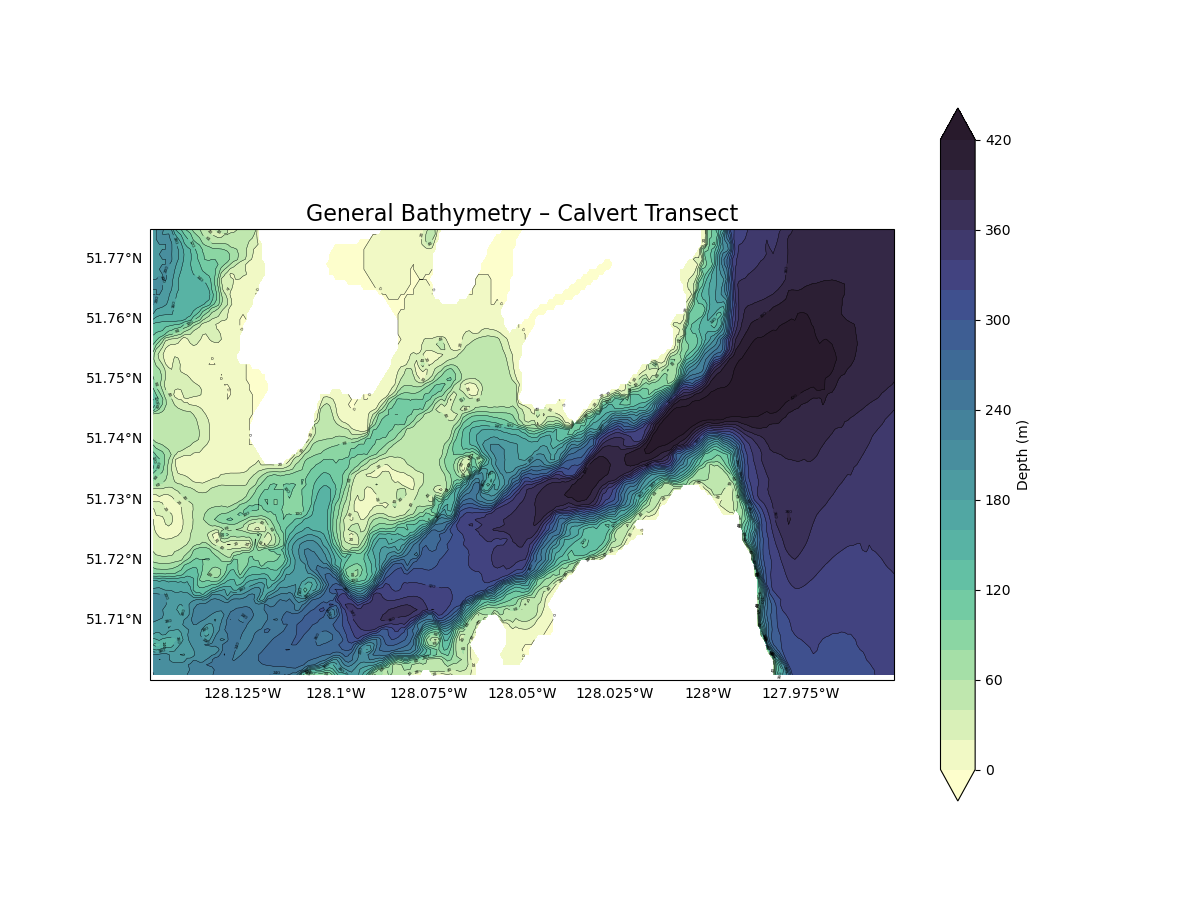

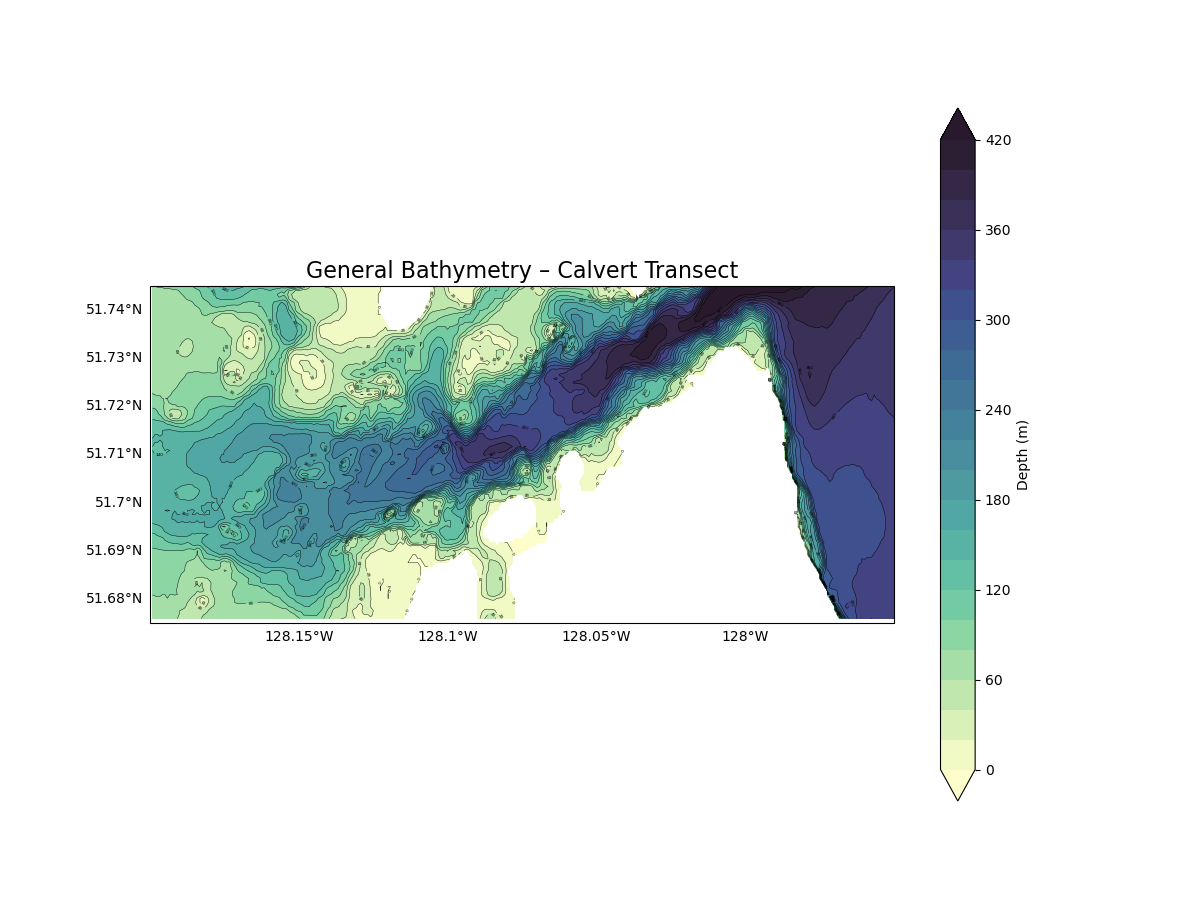

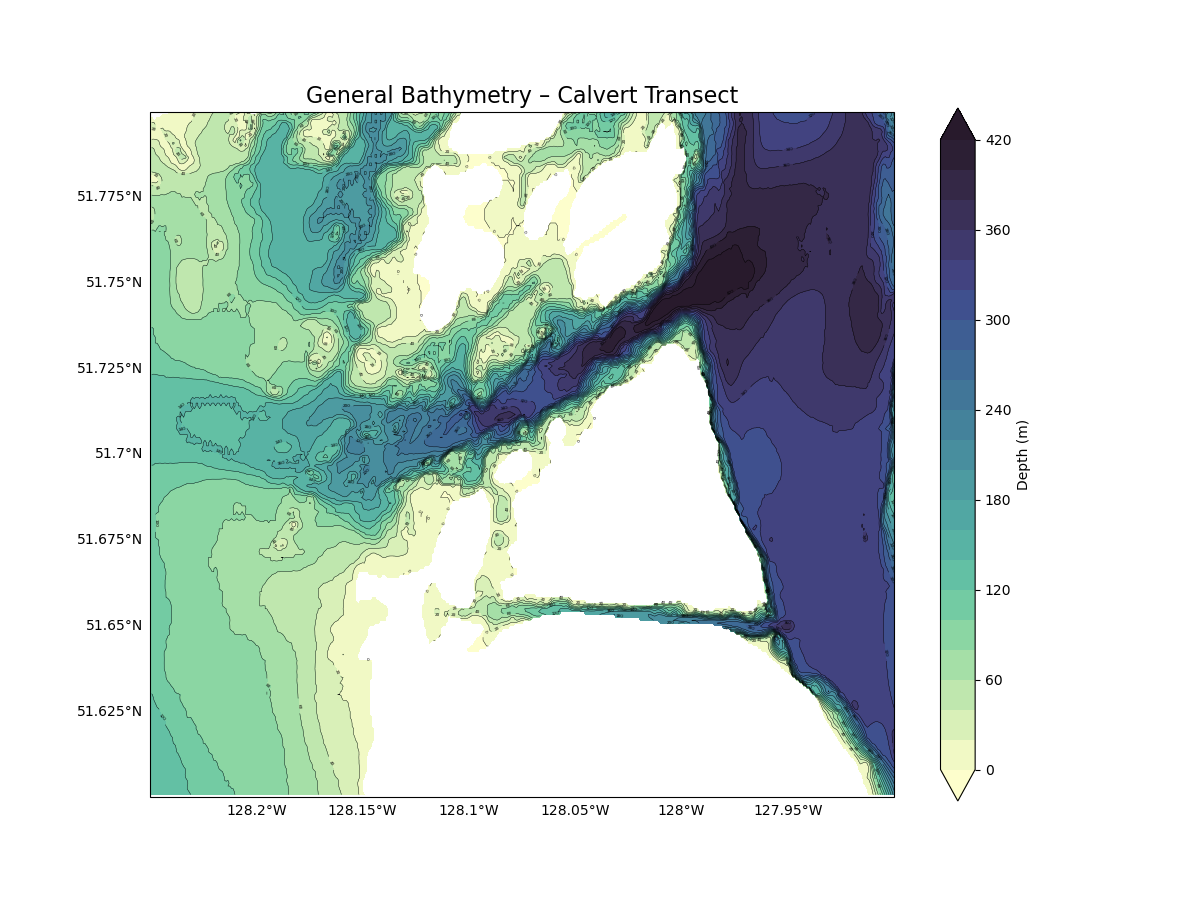

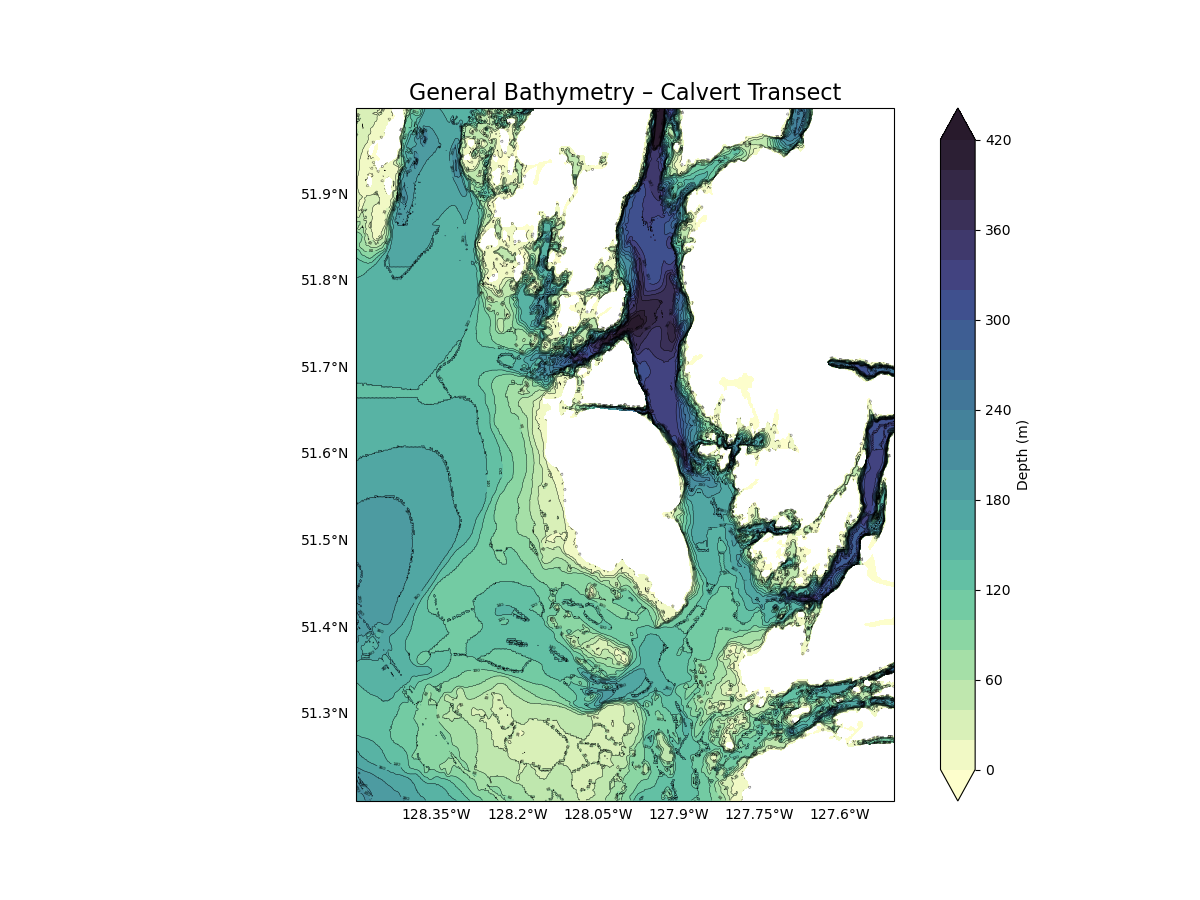

In [4]:
plot_general_bathymetry(
    lon_bounds=(-128.15, -127.95),
    lat_bounds=(51.7, 51.775),
    title='General Bathymetry – Calvert Transect', deepest = 420)

plot_general_bathymetry(
    lon_bounds=(-128.2, -127.95),
    lat_bounds=(51.675 ,51.745),
    title='General Bathymetry – Calvert Transect', deepest = 420)

plot_general_bathymetry(
    lon_bounds=(-128.25, -127.9),
    lat_bounds=(51.6, 51.8),
    title='General Bathymetry – Calvert Transect', deepest = 420)

plot_general_bathymetry(
    lon_bounds=(-128.5, -127.5),
    lat_bounds=(51.2, 52),
    title='General Bathymetry – Calvert Transect', deepest = 420)

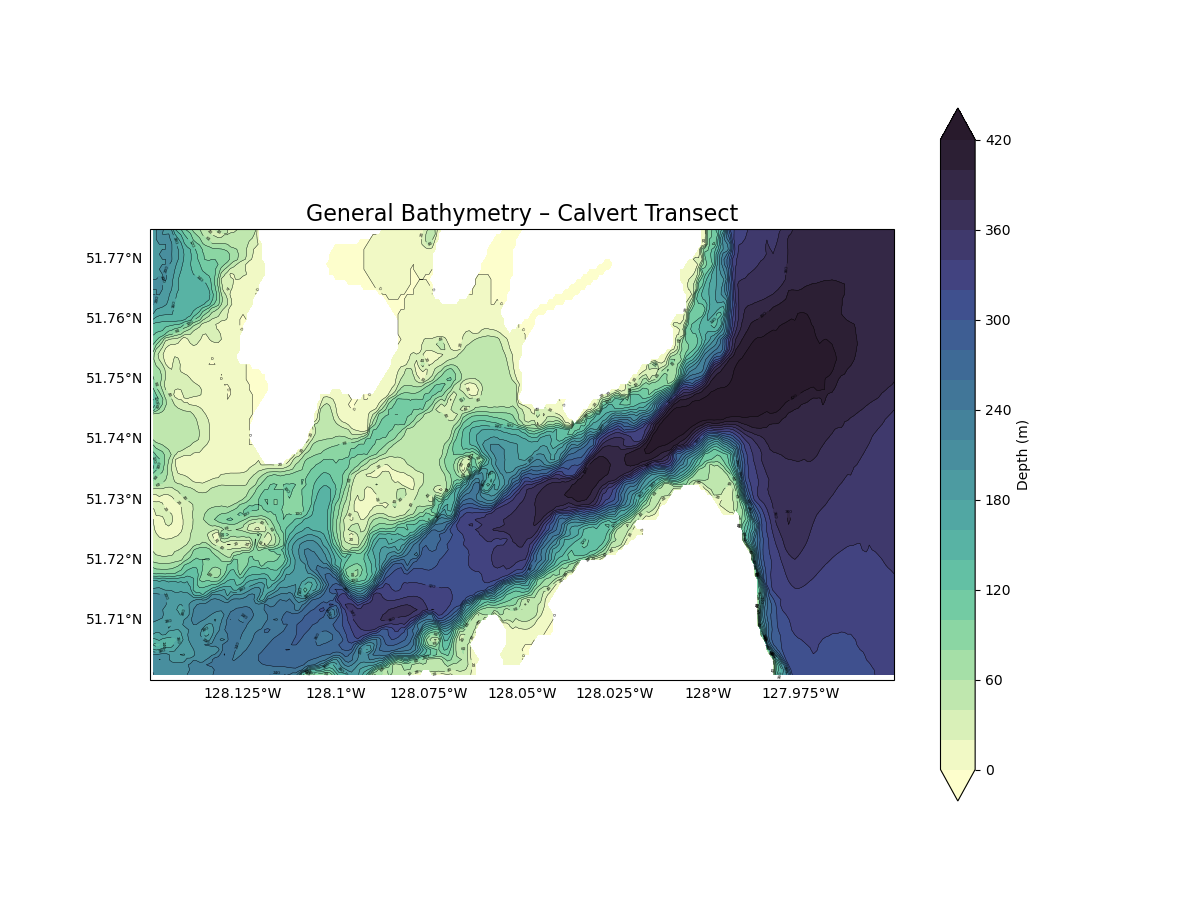

In [5]:
plot_general_bathymetry(
    lon_bounds=(-128.15, -127.95),
    lat_bounds=(51.7, 51.775),
    title='General Bathymetry – Calvert Transect', deepest = 420)
plt.savefig("calvert_bathymetry_highres.png", dpi=1500, bbox_inches='tight')

In [6]:
# Open the bathymetry file and print longitude and latitude bounds
topo_file = os.path.expanduser('~/Desktop/british_columbia_3_msl_2013.nc')
topo = xr.open_dataset(topo_file)
lon_min = float(topo['lon'].min())
lon_max = float(topo['lon'].max())
lat_min = float(topo['lat'].min())
lat_max = float(topo['lat'].max())
print(f"Longitude bounds: ({lon_min}, {lon_max})")
print(f"Latitude bounds: ({lat_min}, {lat_max})")

Longitude bounds: (-137.4499999970135, -122.20000000311349)
Latitude bounds: (48.0500000000015, 54.1999999975415)


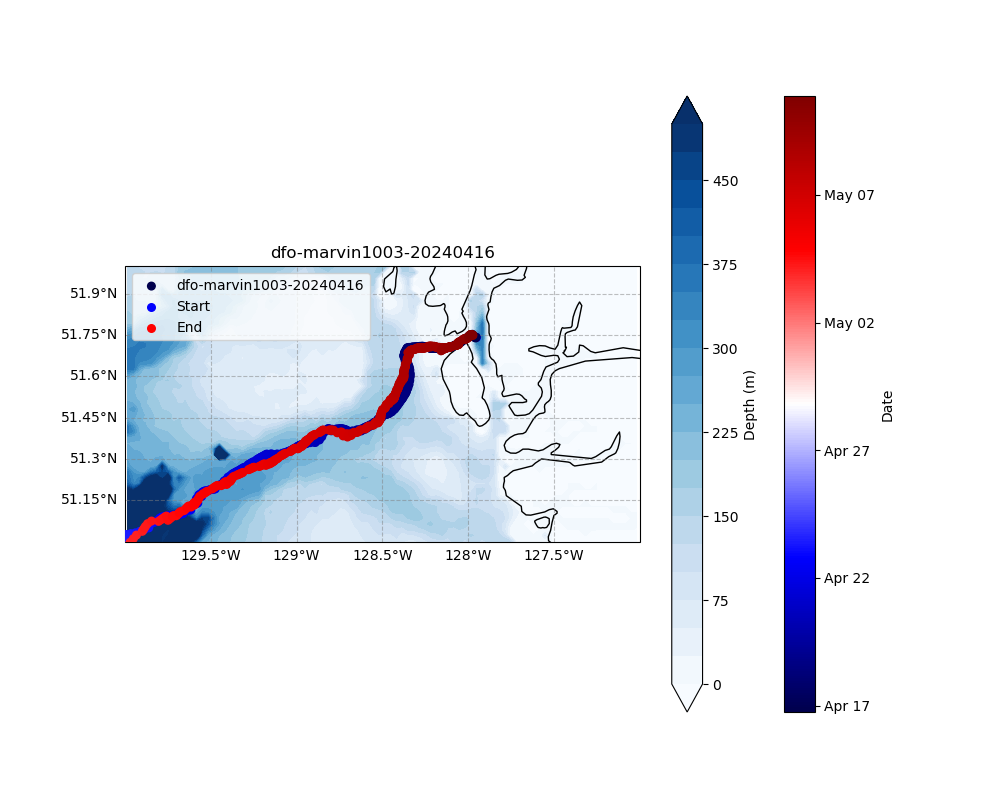

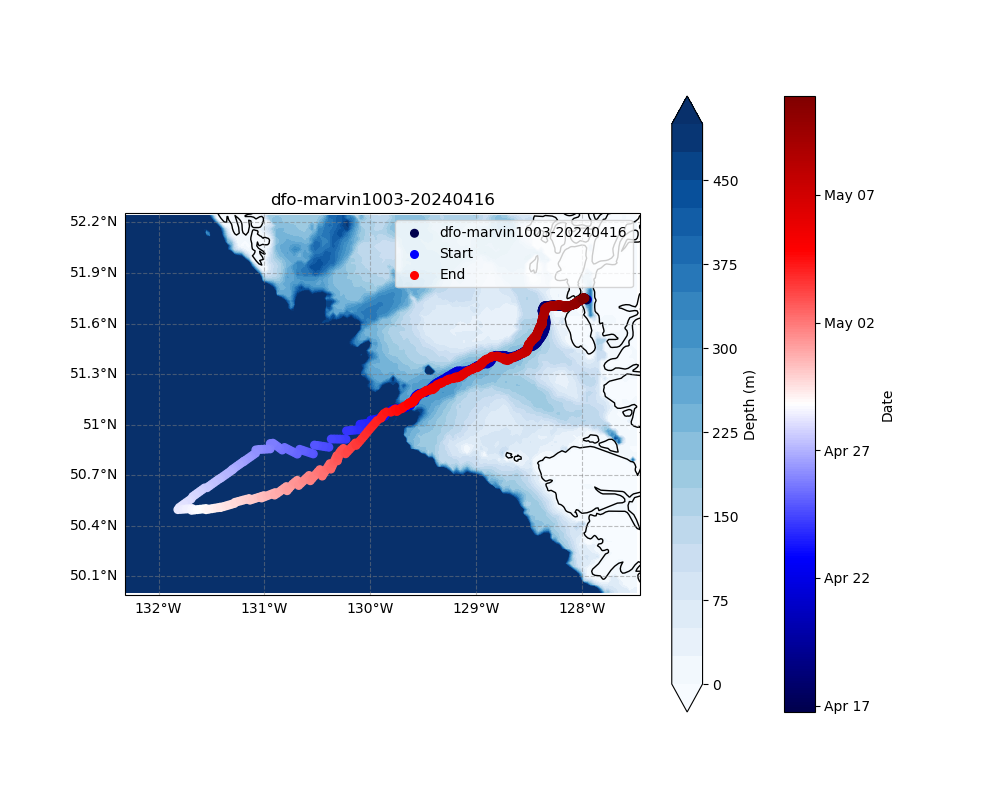

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.dates as mdates

def plot_mission_map(glider_file, lon_bounds=None, lat_bounds=None,
                     topo_file=os.path.expanduser('~/CalvertLine/smith_sandwell_topo_v8_2.nc')):
    """
    Plot glider path over Smith & Sandwell bathymetry for the Calvert Line.

    Parameters:
    - glider_file: str, path to a Calvert Line NetCDF grid file
    - topo_file: str, path to Smith & Sandwell topo NetCDF
    - lon_bounds: list, [lon_min, lon_max], optional
    - lat_bounds: list, [lat_min, lat_max], optional
    """

    # Load glider data
    ds = xr.open_dataset(os.path.expanduser(glider_file))
    longitude = ds['longitude'].values
    latitude = ds['latitude'].values

    # Auto bounds if not provided
    if lon_bounds is None:
        lon_bounds = [longitude.min() - 0.5, longitude.max() + 0.5]
    if lat_bounds is None:
        lat_bounds = [latitude.min() - 0.5, latitude.max() + 0.5]

    # Load and subset topo
    topo = xr.open_dataset(topo_file)
    topo = topo.sel(
        longitude=slice(lon_bounds[0] + 360, lon_bounds[1] + 360),
        latitude=slice(lat_bounds[0], lat_bounds[1])
    )
    topo['longitude'] = topo['longitude'] - 360  # Convert to west longitudes

    # Set up figure
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(lon_bounds + lat_bounds, crs=ccrs.PlateCarree())

    # Coastline and gridlines
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))

    # Bathymetry
    topo_var = -topo['ROSE']
    levels = np.linspace(0, 500, 21)
    contour = ax.contourf(
        topo['longitude'], topo['latitude'], topo_var,
        levels=levels, cmap='Blues', extend='both'
    )

    # Glider mission label from filename
    glider_mission = os.path.basename(glider_file).split('.')[0]
    glider_mission = os.path.basename(glider_file).split('_')[0]

    time_vals = ds['time'].values
    time_nums = mdates.date2num(time_vals)
    
    sc = ax.scatter(longitude, latitude, c=time_nums, cmap='seismic',
                    s=30, transform=ccrs.PlateCarree(), zorder=6, label=f'{glider_mission}')

    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Date')

    # Format ticks as readable dates
    cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    # Start and end markers
    ax.scatter(longitude[0], latitude[0], color='blue', label='Start', s=30)
    ax.scatter(longitude[-1], latitude[-1], color='red', label='End', s=30)
    ax.legend()

    # Title and colorbar
    plt.title(f'{glider_mission}')
    plt.colorbar(contour, ax=ax, label='Depth (m)')

plot_mission_map(glider_file='~/CalvertLine/dfo-marvin1003-20240416_grid_delayed.nc', lon_bounds =[-130, -127], lat_bounds =[51, 52])

plot_mission_map(glider_file='~/CalvertLine/dfo-marvin1003-20240416_grid_delayed.nc')

In [8]:
# ------- TEST function of mapping --------- # 

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.dates as mdates
import cmocean
import glob
import os
import waypoint_distance as wd

def plot_multiple_missions_map(glider_files, long_bounds=None, lat_bounds=None,
                               topo_file=os.path.expanduser('~/CalvertLine/smith_sandwell_topo_v8_2.nc')):
    """
    Plot multiple glider paths over Smith & Sandwell bathymetry for the Calvert Line.

    Parameters:
    - glider_files: list of str, paths to NetCDF glider grid files
    - topo_file: str, path to Smith & Sandwell topo NetCDF
    - long_bounds, lat_bounds: lists, optional bounds
    """

    # First, open all datasets and extract lat/lon for autoscaling
    datasets = [xr.open_dataset(os.path.expanduser(f)) for f in glider_files]
    all_lons = np.concatenate([ds['longitude'].values for ds in datasets])
    all_lats = np.concatenate([ds['latitude'].values for ds in datasets])

    if long_bounds is None:
        long_bounds = [all_lons.min() - 0.5, all_lons.max() + 0.5]
    if lat_bounds is None:
        lat_bounds = [all_lats.min() - 0.5, all_lats.max() + 0.5]
    
    # Load topo
    topo = xr.open_dataset(topo_file)
    topo = topo.sel(
        longitude=slice(long_bounds[0] + 360, long_bounds[1] + 360),
        latitude=slice(lat_bounds[0], lat_bounds[1]))
    
    topo['longitude'] = topo['longitude'] - 360  # Convert to west longitudes

    # Set up plot
    fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
    ax.set_extent(long_bounds + lat_bounds, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))

    # Plot bathymetry
    topo_var = -topo['ROSE']

    levels = np.linspace(0, 100, 21)
    contour = ax.contourf(topo['longitude'], topo['latitude'], topo_var,
                          levels=levels, cmap=cmocean.cm.deep, extend='both')
    plt.colorbar(contour, ax=ax, label='Depth (m)')

    # Step 1: Combine all time values across datasets
    all_time_vals = np.concatenate([ds['time'].values for ds in datasets])
    all_time_nums = mdates.date2num(all_time_vals)

    vmin = all_time_nums.min()
    vmax = all_time_nums.max()

    # This code block filters for data within certain lon and lat bounds and then scatter plots the glider mission positions
    for i, ds in enumerate(datasets):
        lons = ds['longitude'].values
        lats = ds['latitude'].values
        time_vals = ds['time'].values
        time_nums = mdates.date2num(time_vals)

        # Masking lat and lon values for data that I want to look at
        lat_mask = (lats >= 51.4) & (lats <= 51.8)
        lon_mask = (lons >= -128.8) & (lons <= -127.8)
        mask = lat_mask & lon_mask
        lats = lats[mask]
        lons = lons[mask]
        time_nums = time_nums[mask]
        label = os.path.basename(glider_files[i]).split('_')[0]
        sc = ax.scatter(lons, lats, c=time_nums, cmap='seismic',
                        vmin=vmin, vmax=vmax, s=5, transform=ccrs.PlateCarree(), zorder=5, label=label)
        
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01, extend = 'both')
    cbar.set_label('Date')
    cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Defining a transect to later use as my coordinate system
    waypoint_lon = [-127.950, -128.115, -128.243, -128.514, -128.646, -128.798]
    waypoint_lat = [51.757, 51.705, 51.715, 51.450, 51.4165, 51.408]
    ax.scatter(ds['longitude'][58], ds['latitude'][58], s = 50, color = 'lime' )
    # ax.plot(waypoint_lon, waypoint_lat, color='black', linestyle = '-', linewidth = 5, label = 'Waypoint transect')
    # if len(datasets) < 0:
    ax.legend(title='Glider Missions')
    plt.title('Glider Missions map')
    ax.set_aspect(1 / np.cos(np.deg2rad(np.mean(lat_bounds))))

# def filter_dataset_by_bounds(ds, lat_bounds, lon_bounds):
#     # Function that takes the dataset ds and filters it for only data within the box defined in the long and lat bounds
#     lat_min, lat_max = lat_bounds
#     lon_min, lon_max = lon_bounds

#     lats = ds['latitude']
#     lons = ds['longitude']

#     mask = (lats >= lat_min) & (lats <= lat_max) & \
#            (lons >= lon_min) & (lons <= lon_max)

#     return ds.where(mask, drop=True)


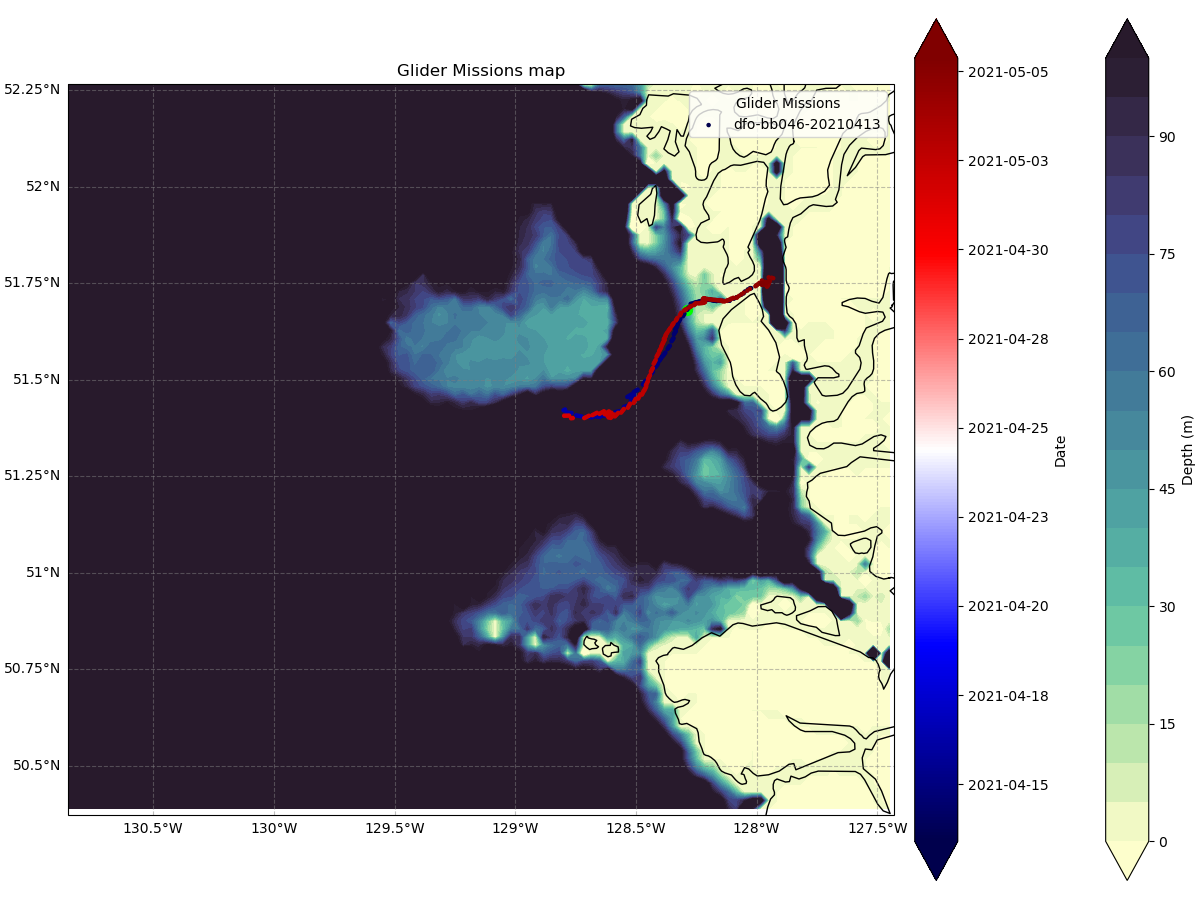

In [9]:
plot_multiple_missions_map(['~/CalvertLine/dfo-bb046-20210413_grid_delayed.nc',])

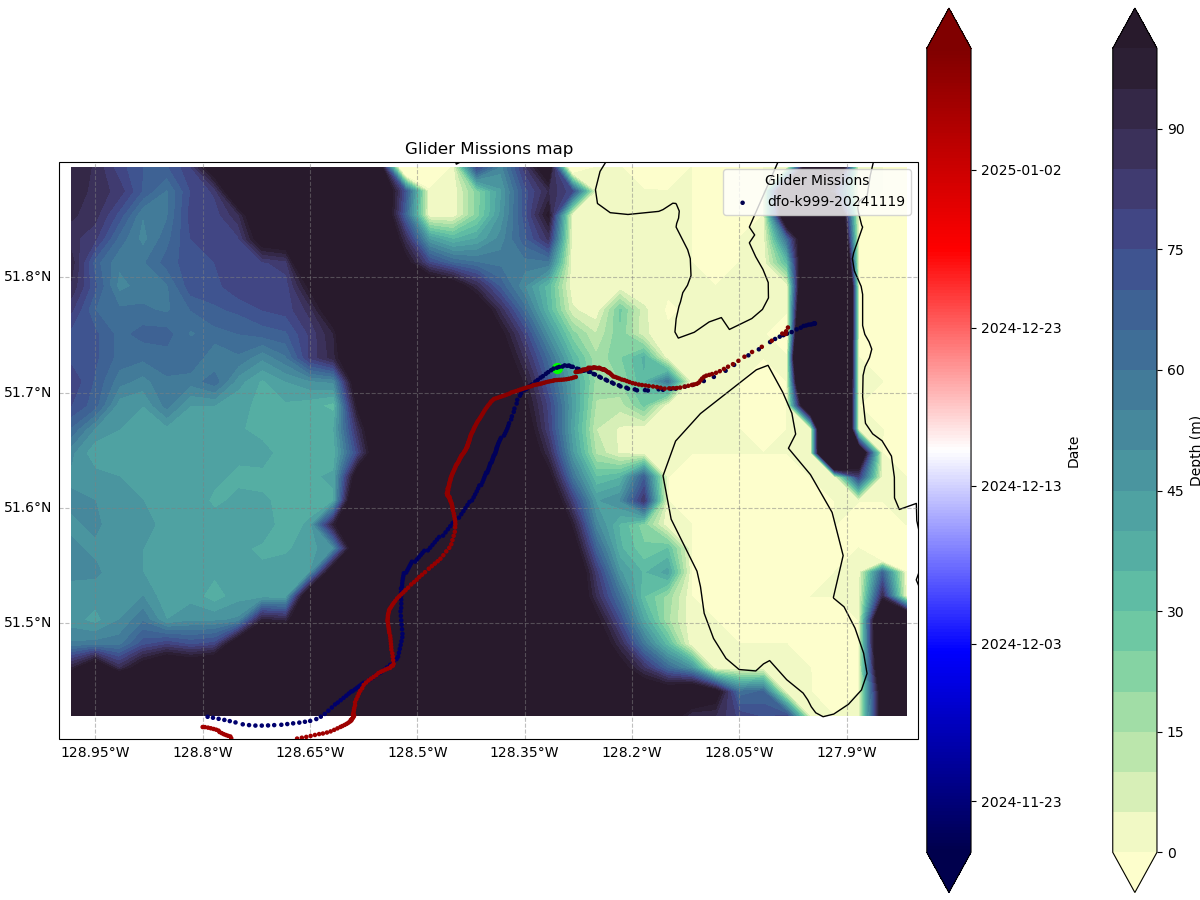

In [10]:
# Plotting all missions
file_dir = os.path.expanduser('~/CalvertLine/')
all_nc_files = sorted(glob.glob(os.path.join(file_dir, '*_grid_delayed.nc')))
# plot_multiple_missions_map(all_nc_files, lat_bounds=(51.2, 52), long_bounds=(-129.2, -127.75))

# # Plotting specified missions
# plot_multiple_missions_map([
#     '~/CalvertLine/dfo-bb046-20200717_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20200810_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20200908_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20201006_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20201103_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20210212_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20210324_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20210413_grid_delayed.nc',
#     '~/CalvertLine/dfo-bb046-20210511_grid_delayed.nc'], lat_bounds = (51.2, 52 ) , long_bounds = (-129.2, -127.75))

# # Plotting one mission


# plot_multiple_missions_map([
#     '~/CalvertLine/dfo-k999-20230320_grid_delayed.nc',
#     '~/CalvertLine/dfo-k999-20230418_grid_delayed.nc',
#     '~/CalvertLine/dfo-k999-20230516_grid_delayed.nc',
#     '~/CalvertLine/dfo-k999-20230811_grid_delayed.nc',
#     '~/CalvertLine/dfo-k999-20230915_grid_delayed.nc',
#     # '~/CalvertLine/dfo-eva035-20230518_grid_delayed.nc',
#     '~/CalvertLine/dfo-eva035-20230620_grid_delayed.nc',
#     '~/CalvertLine/dfo-eva035-20230720_grid_delayed.nc',
#     # '~/CalvertLine/dfo-eva035-20230811_grid_delayed.nc',
#     # '~/CalvertLine/dfo-eva035-20230915_grid_delayed.nc',
#     '~/CalvertLine/dfo-eva035-20231019_grid_delayed.nc',
#     '~/CalvertLine/dfo-colin1142-20240312_grid_delayed.nc'  # included in 2023-2024 grouping
# ], lat_bounds=(51.6, 51.9), long_bounds=(-128.4, -127.8))

plot_multiple_missions_map([
    # '/Users/martinwilliamson/CalvertLine_reprocessed/dfo-k999-20241023_grid_delayed.nc',
    # '/Users/martinwilliamson/CalvertLine_reprocessed/dfo-k999-20230811_grid_delayed.nc',
    # '/Users/martinwilliamson/CalvertLine_reprocessed/dfo-k999-20230915_grid_delayed.nc',
    # '/Users/martinwilliamson/CalvertLine_reprocessed/dfo-k999-20241119_grid_delayed.nc',
    '/Users/martinwilliamson/CalvertLine_reprocessed/dfo-k999-20241119_grid_delayed.nc',
      ], lat_bounds=(51.4, 51.9), long_bounds=(-129, -127.8))


In [11]:
all_nc_files

['/Users/martinwilliamson/CalvertLine/dfo-bb046-20200717_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20200810_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20200908_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20201006_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20201103_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20210212_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20210324_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20210413_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20210511_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20220608_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-bb046-20220707_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-colin1142-20240312_grid_delayed.nc',
 '/Users/martinwilliamson/CalvertLine/dfo-eva035-20190612_grid_delayed.nc',
 '/Users/martinwilli

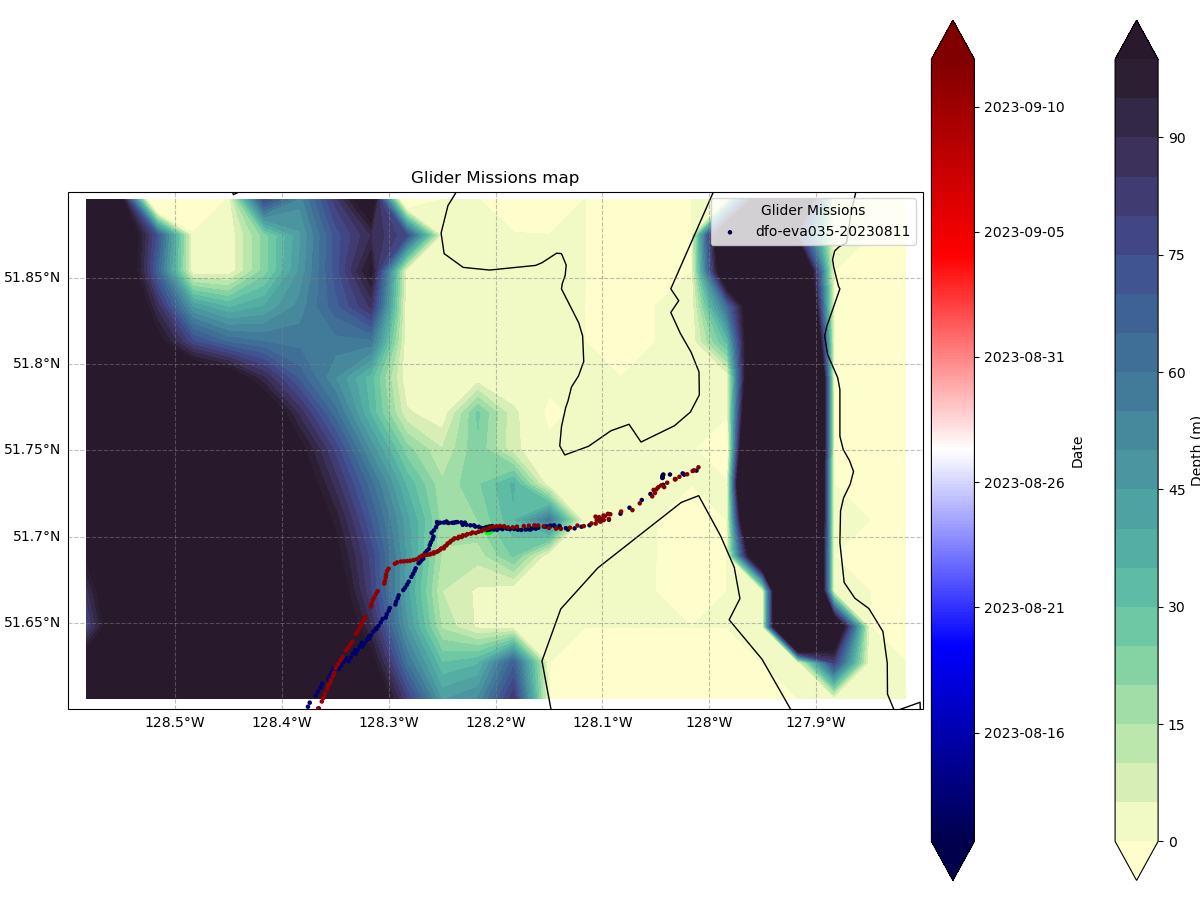

In [12]:
# # Open a file, project the lat and longs onto a waypoint system, define an along transect, add this transect as a variable to the dataset (useful for plotting)
# '/Users/martinwilliamson/CalvertLine/dfo-eva035-20230518_grid_delayed.nc',
#  '/Users/martinwilliamson/CalvertLine/dfo-eva035-20230620_grid_delayed.nc',
#  '/Users/martinwilliamson/CalvertLine/dfo-eva035-20230720_grid_delayed.nc',


file_pathway = ('~/CalvertLine/dfo-eva035-20230915_grid_delayed.nc') # ok
file_pathway = ('~/CalvertLine/dfo-eva035-20230811_grid_delayed.nc')
ds = xr.open_dataset(os.path.expanduser(file_pathway))
waypoint_lon = np.array([-127.950, -128.115, -128.243, -128.514, -128.646, -128.798])
waypoint_lat = np.array([51.757, 51.705, 51.715, 51.450, 51.4165, 51.408])
alongx, acrossx, segment = wd.get_simple_distance(shiplon=ds['longitude'].values, shiplat=ds['latitude'].values, wplon=waypoint_lon, wplat=waypoint_lat, central_lat = 51.715)
ds = ds.assign(along= (('time',), alongx))
ds = ds.assign(across= (('time',), acrossx))

plot_multiple_missions_map([file_pathway], lat_bounds=(51.6, 51.9), long_bounds=(-128.6, -127.8))
# print(f'Gradient of along values are : {np.gradient(ds['along'].values)}')
along = ds['along'].values
gradient = np.gradient(ds['along'].values)
gradient
depth = ds['depth'].values


In [13]:
ds

<xarray.Dataset> Size: 148MB
Dimensions:                (depth: 1100, time: 931)
Coordinates:
  * depth                  (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.1e+03
    profile                (time) float64 7kB ...
  * time                   (time) datetime64[ns] 7kB 2023-08-11T15:46:36.3845...
Data variables: (12/25)
    longitude              (time) float64 7kB -128.0 -128.0 ... -128.0 -128.0
    latitude               (time) float64 7kB 51.73 51.73 51.74 ... 51.73 51.73
    profile_time_start     (time) datetime64[ns] 7kB ...
    profile_time_end       (time) datetime64[ns] 7kB ...
    heading                (depth, time) float64 8MB ...
    pitch                  (depth, time) float64 8MB ...
    ...                     ...
    potential_density      (depth, time) float64 8MB ...
    density                (depth, time) float64 8MB ...
    potential_temperature  (depth, time) float64 8MB ...
    mission_number         int32 4B ...
    along                  (time) float64 7kB 6.912e+03 6.914e+03 ... 7.21e+03
    across                 (time) float64 7kB 659.7 645.1 752.7 ... 234.1 257.5
Attributes: (12/66)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Calvert Island deployment
    contributor_name:          James Pegg, Jody Klymak, Tetjana Ross, Hayley ...
    ...                        ...
    summary:                   Glider deployed near Calvert Island BC as part...
    time_coverage_end:         2023-09-11T23:17:46.117000000
    time_coverage_start:       2023-08-11T14:38:30.671000000
    title:                     dfo-eva035-20230811T1438
    transmission_system:       IRIDIUM
    wmo_id:                    4803917

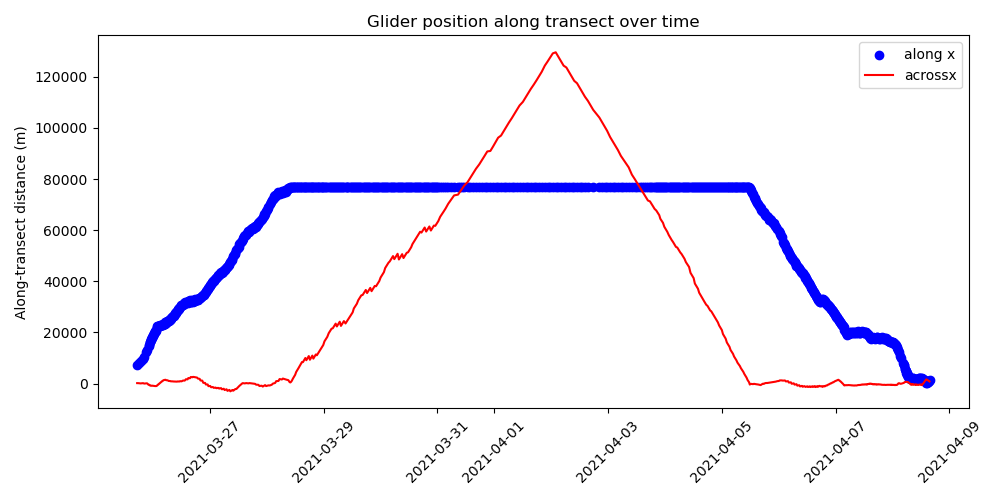

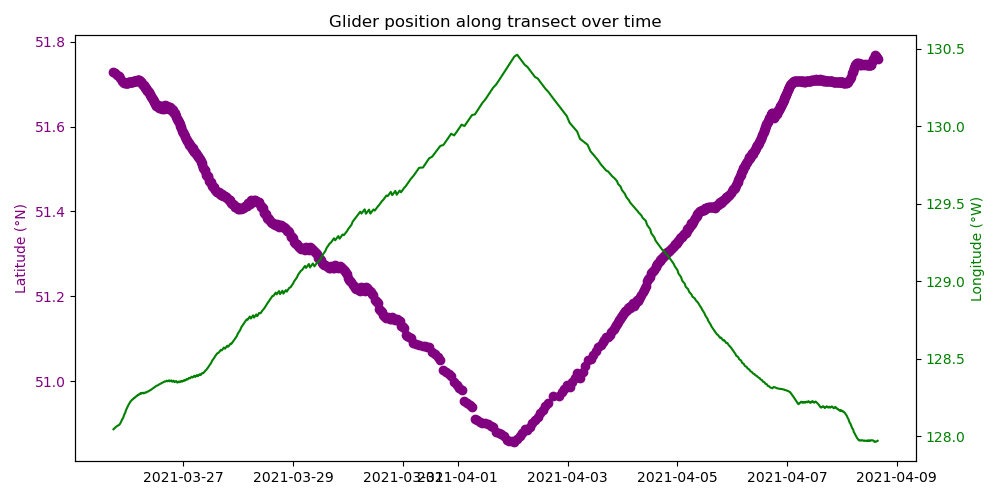

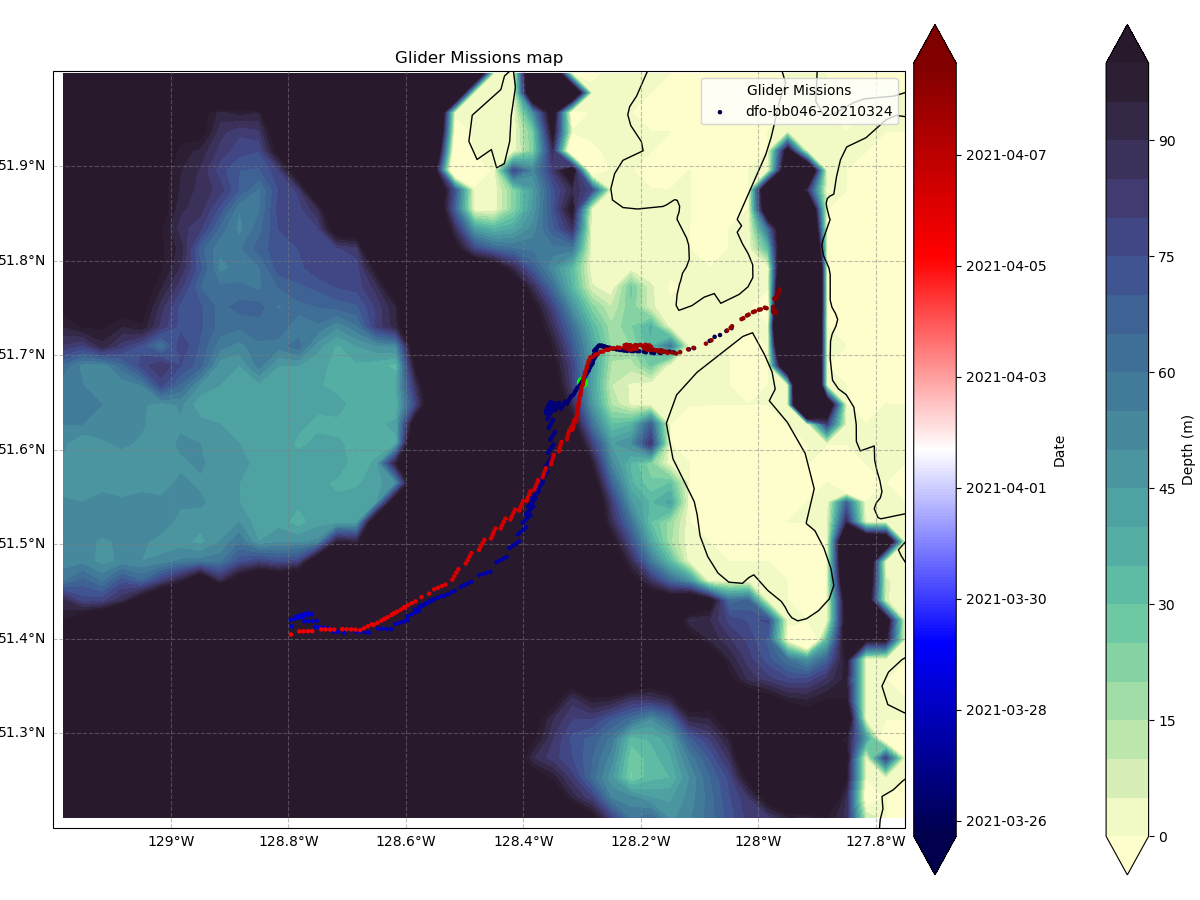

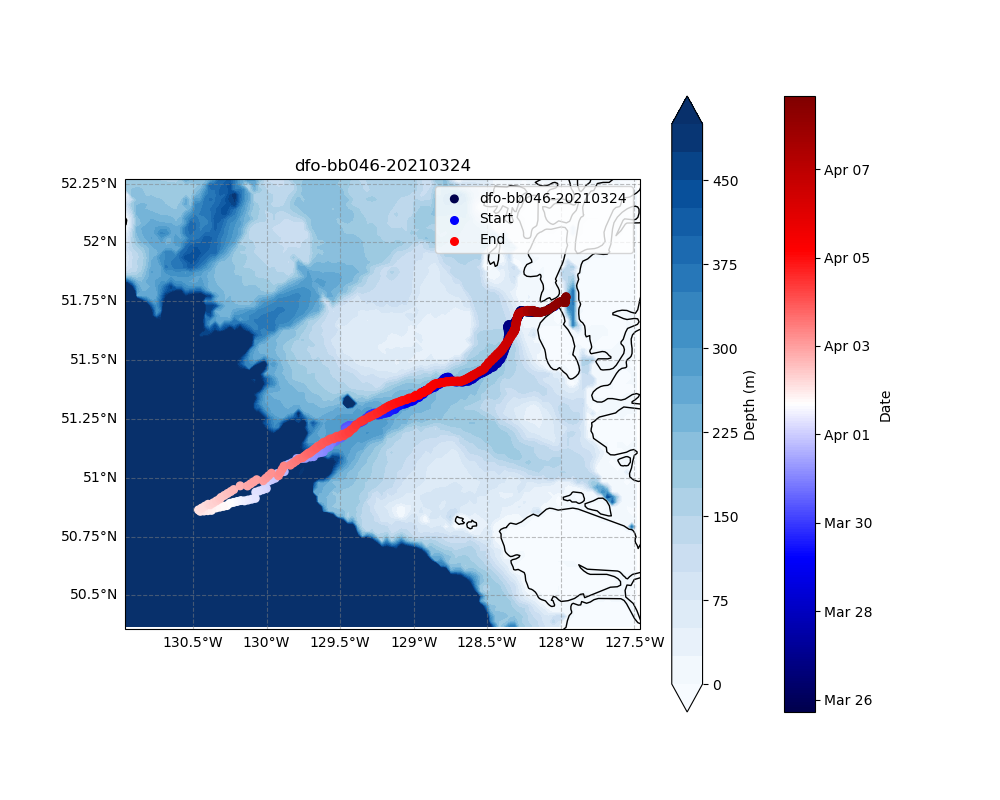

In [14]:
file_pathway = ('~/CalvertLine/dfo-bb046-20210324_grid_delayed.nc')
ds = xr.open_dataset(file_pathway)

# full Calvert line transect
waypoint_lon = np.array([-127.950, -128.115, -128.243, -128.514, -128.646, -128.798, -130.459])
waypoint_lat = np.array([51.757, 51.705, 51.715, 51.450, 51.4165, 51.408, 50.850])

# Smaller Calvert Line transect
waypoint_lon = np.array([-127.950, -128.115, -128.243, -128.514, -128.646, -128.798])
waypoint_lat = np.array([51.757, 51.705, 51.715, 51.450, 51.4165, 51.408])

# Project full lat/lon onto transect
alongx, acrossx, segment = wd.get_simple_distance(
    shiplon=ds['longitude'].values,
    shiplat=ds['latitude'].values,
    wplon=waypoint_lon,
    wplat=waypoint_lat, central_lat = 51.715)

plt.figure(figsize=(10, 5))
plt.scatter(ds['time'], alongx, color = 'blue', label = 'along x')
plt.plot(ds['time'], acrossx, color = 'red', label ='acrossx')
plt.ylabel('Along-transect distance (m)')
plt.legend()
plt.title('Glider position along transect over time')
plt.xticks(rotation=45)  
plt.tight_layout()   
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Latitude on left y-axis
ax1.scatter(ds['time'], ds['latitude'].values, color='purple', label='latitude')
ax1.set_ylabel('Latitude (°N)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Longitude on right y-axis (note: -1 * to flip west-positive)
ax2 = ax1.twinx()
ax2.plot(ds['time'], -1 * ds['longitude'].values, color='green', label='longitude')
ax2.set_ylabel('Longitude (°W)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Shared formatting
plt.title('Glider position along transect over time')
plt.xticks(rotation=45)
fig.tight_layout()

plot_multiple_missions_map(['~/CalvertLine/dfo-bb046-20210324_grid_delayed.nc'], lat_bounds = (51.2, 52 ) , long_bounds = (-129.2, -127.75))
plot_mission_map(glider_file='~/CalvertLine/dfo-bb046-20210324_grid_delayed.nc')

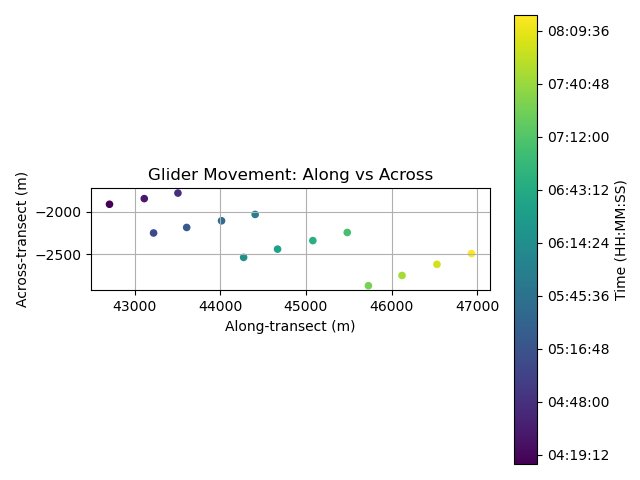

In [15]:
# Open a file, project the lat and longs onto a waypoint system, define an along transect, add this transect as a variable to the dataset (useful for plotting)
file_pathway = ('~/CalvertLine/dfo-bb046-20210324_grid_delayed.nc')
ds = xr.open_dataset(file_pathway)
waypoint_lon = np.array([-127.950, -128.115, -128.243, -128.514, -128.646, -128.798])
waypoint_lat = np.array([51.757, 51.705, 51.715, 51.450, 51.4165, 51.408])
alongx, acrossx, segment = wd.get_simple_distance(shiplon=ds['longitude'].values, shiplat=ds['latitude'].values, wplon=waypoint_lon, wplat=waypoint_lat, central_lat = 51.715)
ds = ds.assign(along= (('time',), alongx))
ds = ds.assign(across= (('time',), acrossx))

# Subsetting the dataset for only values that I want to look at 
lons = ds['longitude'].values
lats = ds['latitude'].values
lat_mask = (lats >= 51.4) & (lats <= 51.8)
lon_mask = (lons >= -128.8) & (lons <= -127.8)
mask = lat_mask & lon_mask
ds = ds.sel(time = mask)

# plt.figure(figsize=(10, 5))
# plt.scatter(ds['time'], ds['along'], color = 'blue', label = 'along x')
# plt.scatter(ds['time'], ds['across'], color = 'red', label ='acrossx')
# plt.ylabel('Along-transect distance (m)')
# plt.legend()
# plt.title('Glider position along transect over time')
# plt.xticks(rotation=45)  
# plt.tight_layout()   
# plt.show()

# Subset
subset = ds.sel(time=slice("2021-03-27T04:00", "2021-03-27T08:30"))

# Convert time to numerical for coloring
time_nums = mdates.date2num(subset['time'].values)

# Plot
plt.figure(figsize=(6.4, 4.8))
sc = plt.scatter(subset['along'], subset['across'], c=time_nums, cmap='viridis', s=20)

# Colorbar with formatted dates
cbar = plt.colorbar(sc)
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
cbar.set_label('Time (HH:MM:SS)')

plt.xlabel("Along-transect (m)")
plt.ylabel("Across-transect (m)")
plt.title("Glider Movement: Along vs Across")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Subset data
subset = ds.sel(time=slice("2021-03-27", "2021-03-30"))


In [17]:
ds['along'].values
np.gradient(ds['time'].values)/1e9

array([  2140,   2638,   3448,   2696,   2324,   2212,   1818,   1668,
         1060,    674,    576,    780,    802,    734,    678,    676,
          700,    700,    814,    870,    818,    820,    812,    788,
          782,    794,    810,    814,    796,    766,    747,    758,
          751,    732,    786,    812,    812,    842,    720,    710,
          882,    910,    774,    770,   1090,   1096,    778,    770,
          918,    922,    754,    724,   1000,   1006,    728,    732,
         1054,   1074,    766,    760,    932,    954,    798,    788,
          944,    966,    818,    816,   1538,   1540,    816,    808,
         1348,   1348,    808,    804,   1002,   1004,    802,    790,
         1076,   1088,    796,    790,    930,    946,    828,    826,
          982,    994,    842,    840,   1014,   1038,    884,    870,
         1042,   1080,    924,    896,   1264,   1264,    884,    888,
         1046,   1050,    896,    896,   1050,   1058,    908,    898,
      